## PART 1

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import moviepy.editor as mpy

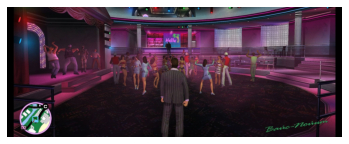

In [18]:
background = cv2.imread("Malibu.jpg")
plt.axis("off")
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.show()

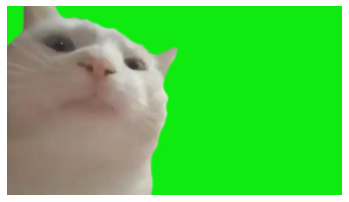

In [19]:
cat_0 = cv2.imread("cat/cat_0.png")
plt.axis("off")
plt.imshow(cv2.cvtColor(cat_0, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
background_height = background.shape[0]
background_width = background.shape[1]
cat_height = cat_0.shape[0]
ratio = cat_height/background_height

background = cv2.resize(background, (int(background_width*ratio), cat_height))

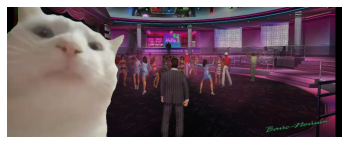

In [21]:
cat_0_green = cat_0[:,:,1]
cat_0_red = cat_0[:,:,0]

foreground = np.logical_or(cat_0_green < 180, cat_0_red > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nonzero_cat = cat_0[nonzero_x, nonzero_y, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

Human sorting algorithm below is adopted from
https://nedbatchelder.com/blog/200712/human_sorting.html

In [22]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split(r'(\d+)', text)]

In [23]:
path = "cat"
cat_frames = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
cat_frames.sort(key=natural_keys)

In [24]:
new_cat_frames = []

for frame in cat_frames:
    cat = cv2.imread(frame)
    cat_green = cat[:,:,1]
    cat_red = cat[:,:,0]

    foreground = np.logical_or(cat_green < 180, cat_red > 150)
    nonzero_x, nonzero_y = np.nonzero(foreground)
    nonzero_cat = cat[nonzero_x, nonzero_y, :]

    new_frame = background.copy()
    new_frame[nonzero_x, nonzero_y, :] = nonzero_cat
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
    new_cat_frames.append(new_frame)

In [25]:
clip = mpy.ImageSequenceClip(new_cat_frames, fps=25)
audio = mpy.AudioFileClip("selfcontrol_part.wav").set_duration(clip.duration)
clip = clip.set_audio(audioclip=audio)
clip.write_videofile("part1_video.mp4", codec="libx264")

t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]                

Moviepy - Building video part1_video.mp4.
MoviePy - Writing audio in part1_videoTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video part1_video.mp4



Moviepy - Done !
Moviepy - video ready part1_video.mp4


## PART 2

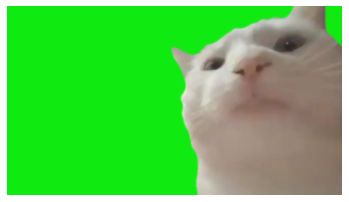

In [26]:
cat_0_mirrored = np.flip(cat_0, 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(cat_0_mirrored, cv2.COLOR_BGR2RGB))
plt.show()

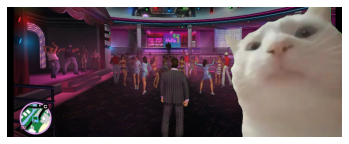

In [27]:
cat_0_mirrored_green = cat_0_mirrored[:,:,1]
cat_0_mirrored_red = cat_0_mirrored[:,:,0]
horizontal_shift = background.shape[1] - cat_0_mirrored.shape[1]

foreground = np.logical_or(cat_0_mirrored_green < 180, cat_0_mirrored_red > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nonzero_cat = cat_0_mirrored[nonzero_x, nonzero_y, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y + horizontal_shift, :] = nonzero_cat

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

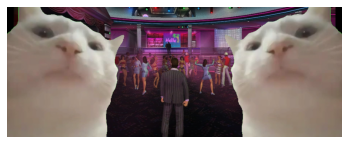

In [28]:
foreground = np.logical_or(cat_0_green < 180, cat_0_red > 150)
foreground_mirrored = np.logical_or(cat_0_mirrored_green < 180, cat_0_mirrored_red > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nz_x_mirrored, nz_y_mirrored = np.nonzero(foreground_mirrored)
nonzero_cat = cat_0[nonzero_x, nonzero_y, :]
nz_cat_mirrored = cat_0_mirrored[nz_x_mirrored, nz_y_mirrored, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat
new_frame[nz_x_mirrored, nz_y_mirrored + horizontal_shift, :] = nz_cat_mirrored

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
new_cat_frames = []

for frame in cat_frames:
    cat = cv2.imread(frame)
    cat_mir = np.flip(cat, 1)
    new_frame = background.copy()
    
    fg = np.logical_or(cat[:,:,1] < 180, cat[:,:,0] > 150)
    fg_mir = np.logical_or(cat_mir[:,:,1] < 180, cat_mir[:,:,0] > 150)
    
    nz_x, nz_y = np.nonzero(fg)
    nz_cat = cat[nz_x, nz_y, :]
    new_frame[nz_x, nz_y, :] = nz_cat
    
    nz_x, nz_y = np.nonzero(fg_mir)
    nz_cat_mir = cat_mir[nz_x, nz_y, :]
    new_frame[nz_x, nz_y + horizontal_shift, :] = nz_cat_mir
    
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
    new_cat_frames.append(new_frame)

In [30]:
clip = mpy.ImageSequenceClip(new_cat_frames, fps=25)
audio = mpy.AudioFileClip("selfcontrol_part.wav").set_duration(clip.duration)
clip = clip.set_audio(audioclip=audio)
clip.write_videofile("part2_video.mp4", codec="libx264")

t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]                

Moviepy - Building video part2_video.mp4.
MoviePy - Writing audio in part2_videoTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video part2_video.mp4



Moviepy - Done !
Moviepy - video ready part2_video.mp4


## PART 3

In [31]:
def change_brightness(image, brightness=0):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype("int16")
    hsv[:,:,2] += brightness
    hsv[:,:,2] = hsv[:,:,2].clip(min=0, max=255)
    return cv2.cvtColor(hsv.astype("uint8"), cv2.COLOR_HSV2BGR)

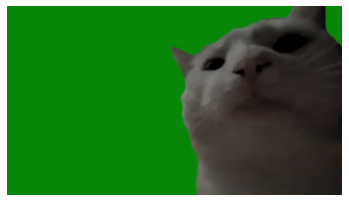

In [32]:
brightness = -100

cat_0_dark = np.flip(cat_0, 1)
cat_0_dark_green = cat_0_dark[:,:,1]
cat_0_dark_red = cat_0_dark[:,:,0]
horizontal_shift = background.shape[1] - cat_0_dark.shape[1]

foreground_dark = np.logical_or(cat_0_dark_green < 180, cat_0_dark_red > 150)
nz_x_dark, nz_y_dark = np.nonzero(foreground_dark)

cat_dark = change_brightness(cat_0_dark, brightness)

nz_cat_dark = cat_dark[nz_x_dark, nz_y_dark, :]

plt.axis("off")
plt.imshow(cv2.cvtColor(cat_dark, cv2.COLOR_BGR2RGB))
plt.show()

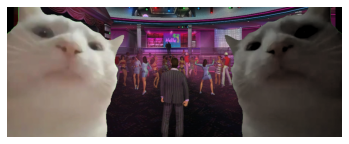

In [33]:
new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat
new_frame[nz_x_dark, nz_y_dark + horizontal_shift, :] = nz_cat_dark

plt.axis("off")
plt.imshow(cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
new_cat_frames = []
brightness = -100

for frame in cat_frames:
    cat = cv2.imread(frame)
    cat_dark = np.flip(cat, 1)
    new_frame = background.copy()
    
    fg = np.logical_or(cat[:,:,1] < 180, cat[:,:,0] > 150)
    fg_dark = np.logical_or(cat_dark[:,:,1] < 180, cat_dark[:,:,0] > 150)
    
    nz_x, nz_y = np.nonzero(fg)
    nz_cat = cat[nz_x, nz_y, :]
    new_frame[nz_x, nz_y, :] = nz_cat
    
    cat_dark = change_brightness(cat_dark, brightness)
    nz_x, nz_y = np.nonzero(fg_dark)
    nz_cat_dark = cat_dark[nz_x, nz_y, :]
    new_frame[nz_x, nz_y + horizontal_shift, :] = nz_cat_dark
    
    new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2RGB)
    new_cat_frames.append(new_frame)

In [35]:
clip = mpy.ImageSequenceClip(new_cat_frames, fps=25)
audio = mpy.AudioFileClip("selfcontrol_part.wav").set_duration(clip.duration)
clip = clip.set_audio(audioclip=audio)
clip.write_videofile("part3_video.mp4", codec="libx264")

t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]                

Moviepy - Building video part3_video.mp4.
MoviePy - Writing audio in part3_videoTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video part3_video.mp4



Moviepy - Done !
Moviepy - video ready part3_video.mp4


## PART 4

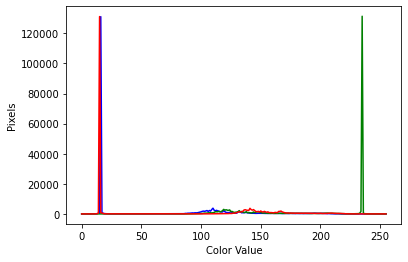

In [158]:
cat_0 = cv2.imread("cat/cat_0.png")

colors = ("b", "g", "r")
for idx, color in enumerate(colors):
    hist, bins = np.histogram(cat_0[:,:,idx], 256, [0, 256])
    plt.plot(bins[0:-1], hist, color=color)

plt.xlabel("Color Value")
plt.ylabel("Pixels")
plt.show()

In [126]:
def get_cat_hist(image):
    fg = np.logical_or(image[:,:,1] < 180, image[:,:,0] > 150)
    nz_x, nz_y = np.nonzero(fg)
    nz_cat = image[nz_x, nz_y, :]
    
    hist = np.zeros([256, nz_cat.shape[1]]).astype("uint32")
    for color in range(nz_cat.shape[1]):
        for pixel in range(nz_cat.shape[0]):
            hist[nz_cat[pixel, color], color] += 1
    return hist

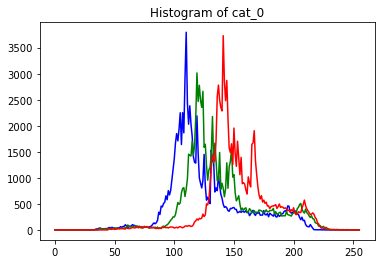

In [127]:
cat_0 = cv2.imread("cat/cat_0.png")
colors = ("b", "g", "r")
hist = get_cat_hist(cat_0)
for idx, color in enumerate(colors):
    plt.plot(hist[:, idx], color=color)
    
plt.title("Histogram of cat_0")
plt.show()

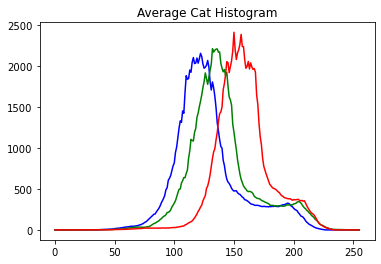

In [131]:
histograms = []
for frame in cat_frames:
    cat = cv2.imread(frame)
    histograms.append(get_cat_hist(cat))
avg_cat_hist = np.mean(histograms, 0).astype("uint32")

for idx, color in enumerate(colors):
    plt.plot(avg_cat_hist[:, idx], color=color)

plt.title("Average Cat Histogram")
plt.show()

In [168]:
def pdf(hist):
#     pdf = np.empty([hist.shape[0], hist.shape[1]])
#     for color in range(pdf.shape[1]):
#         pdf[:, color] = hist[:, color] / np.sum(hist[:, color])
#     return pdf
    return hist / np.sum(hist)

def cdf(hist):
    return np.cumsum(pdf(hist), 0)

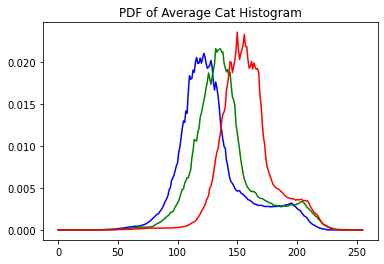

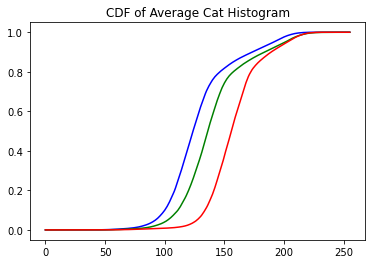

In [147]:
avg_cat_hist_pdf = pdf(avg_cat_hist)
avg_cat_hist_cdf = cdf(avg_cat_hist)

for idx, color in enumerate(colors):
    plt.plot(avg_cat_hist_pdf[:, idx], color=color)

plt.title("PDF of Average Cat Histogram")
plt.show()

for idx, color in enumerate(colors):
    plt.plot(avg_cat_hist_cdf[:, idx], color=color)
    
plt.title("CDF of Average Cat Histogram")
plt.show()

In [163]:
def get_hist(image):
    hist = np.empty([256, image.shape[-1]])
    for idx in range(hist.shape[-1]):
        hist_, bins_ = np.histogram(image[:,:,idx], 256, [0, 256])
        hist[:, idx] = hist_
    return hist, bins

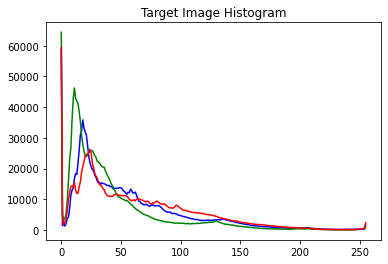

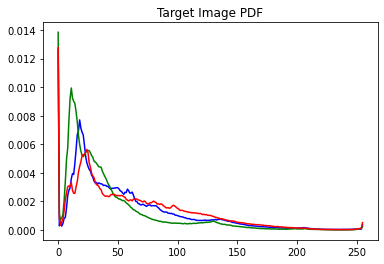

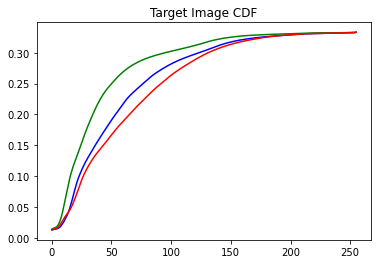

In [169]:
target_image = cv2.imread("Malibu.jpg")
target_hist, bins = get_hist(target_image)

for idx, color in enumerate(colors):
    plt.plot(bins[0:-1], hist[:, idx], color=color)
    
plt.title("Target Image Histogram")
plt.show()

target_hist_pdf = pdf(target_hist)

for idx, color in enumerate(colors):
    plt.plot(target_hist_pdf[:, idx], color=color)
    
plt.title("Target Image PDF")
plt.show()

target_hist_cdf = cdf(target_hist)

for idx, color in enumerate(colors):
    plt.plot(target_hist_cdf[:, idx], color=color)
    
plt.title("Target Image CDF")
plt.show()

In [181]:
def compose_lut(image_hist, target_hist):
    img_cdf = cdf(image_hist)
    trg_cdf = cdf(target_hist)
    lut = np.empty([256,image_hist.shape[-1]])
    
    for color in range(image_hist.shape[-1]):
        g_trg = 0
        for g in range(256):
            while trg_cdf[g_trg, color] < img_cdf[g, color] and g_trg < 255:
                g_trg += 1
            lut[g, color] = g_trg
    return lut

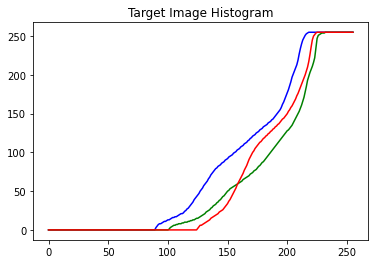

In [182]:
lut = compose_lut(avg_cat_hist, target_hist)
    
for idx, color in enumerate(colors):
    plt.plot(lut[:, idx], color=color)
    
plt.title("Target Image Histogram")
plt.show()